This code block uses the kagglehub library to download four key financial datasets required for the project. It fetches historical stock price data for individual companies, including Tesla and Apple, as well as the S&P 500 index. This automated process ensures all necessary data is acquired from Kaggle and made available locally for analysis.

In [1]:
import kagglehub
rpaguirre_tesla_stock_price_path = kagglehub.dataset_download('rpaguirre/tesla-stock-price')
camnugent_sandp500_path = kagglehub.dataset_download('camnugent/sandp500')
hershyandrew_amzn_dpz_btc_ntfx_adjusted_may_2013may2019_path = kagglehub.dataset_download('hershyandrew/amzn-dpz-btc-ntfx-adjusted-may-2013may2019')
tarunpaparaju_apple_aapl_historical_stock_data_path = kagglehub.dataset_download('tarunpaparaju/apple-aapl-historical-stock-data')

print('Data source import complete.')


100%|██████████| 33.7k/33.7k [00:00<00:00, 19.2MB/s]

Extracting files...


100%|██████████| 29.7k/29.7k [00:00<00:00, 6.73MB/s]

Extracting files...


100%|██████████| 49.5k/49.5k [00:00<00:00, 39.6MB/s]

Extracting files...
Data source import complete.


# Stock Market Analysis using lstm

Time series data, defined as a sequence of data points indexed chronologically, is fundamental across numerous analytical fields. The effective manipulation of such data is therefore a core competency for any data analyst or data scientist.

This notebook provides a comprehensive analysis of historical stock market data, with a particular focus on leading technology corporations: Apple, Amazon, Google, and Microsoft. The methodology involves programmatic data acquisition via the yfinance library, followed by extensive visualization using the Seaborn and Matplotlib libraries. Key objectives include an examination of methods for assessing a stock's risk profile based on its historical performance and the development of a predictive model to forecast future stock prices utilizing a Long Short-Term Memory (LSTM) neural network.

### Research Objectives

This analysis seeks to address the following key questions to provide a comprehensive overview of the selected stocks' performance and predictive potential:

1.  What is the historical price evolution of each stock over the specified time period?
2.  What are the average daily returns, and what do they indicate about stock volatility and performance?
3.  How do moving averages for each stock reveal underlying market trends and momentum?
4.  What is the degree of correlation between the price movements of the different selected stocks?
5.  How can the financial risk associated with an investment in a particular stock be quantified?
6.  To what extent can future stock price movements be predicted? This will be explored by developing and evaluating a Long Short-Term Memory (LSTM) model to forecast the closing price of Apple Inc. (AAPL).

---

### Data Acquisition Methodology

The empirical data required for this analysis will be sourced from Yahoo Finance, a comprehensive and widely utilized repository of financial market data. To facilitate a systematic and reproducible data collection process, the `yfinance` Python library will be employed. This library provides a robust and programmatic interface for downloading historical market data directly from Yahoo Finance, ensuring data integrity and simplifying the acquisition workflow.

### 1. Analysis of Historical Price Changes Over Time

This section outlines the methodology for acquiring historical stock data using the `pandas` library. It will further detail the process of conducting a basic analysis of the stock's primary attributes, with a focus on its price evolution.

In [2]:
!pip install -q yfinance

In [6]:
# Import necessary libraries for data manipulation, analysis, and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set the visual style for the plots for better aesthetics
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
# This command ensures that plots are displayed inline within the notebook
%matplotlib inline

# Import the yfinance library to fetch stock market data
import yfinance as yf

# Import the datetime library to handle date and time objects
from datetime import datetime

# Define the list of stock tickers for the tech companies we want to analyze
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

# Set the time range for data retrieval
# The end date is the current date
end = datetime.now()
# The start date is set to one year prior to the current date
start = datetime(end.year - 1, end.month, end.day)

# Download data for all stocks at once. yfinance handles this efficiently.
# The result is a DataFrame with multi-level columns, e.g., ('Open', 'AAPL'), ('Close', 'GOOG').
all_data = yf.download(tech_list, start=start, end=end, auto_adjust=True)

# The current format is "wide". We need to transform it into a "long" format.
# We use the stack() method, which pivots the column labels into the index.
# We stack at level=1, which corresponds to the Ticker symbols ('AAPL', 'GOOG', etc.).
df_long = all_data.stack(level=1)

# The index is now a MultiIndex of (Date, Ticker). The columns are Open, High, Low, Close, Volume.
# Let's rename the 'Ticker' level of the index for clarity before turning it into a column.
df_long.index.names = ['Date', 'company_name']

# Now, reset the index. This turns the 'Date' and 'company_name' index levels into regular columns.
df = df_long.reset_index()

# Display the last 10 rows of the final, correctly formatted DataFrame to verify the result
df.tail(10)

[*********************100%***********************]  4 of 4 completed
/tmp/ipython-input-3610074806.py:35: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  df_long = all_data.stack(level=1)


Price,Date,company_name,Close,High,Low,Open,Volume
990,2025-08-05,GOOG,195.320007,198.699997,194.675003,195.544998,19010200
991,2025-08-05,MSFT,527.750000,537.299988,527.239990,537.179993,19171600
992,2025-08-06,AAPL,213.250000,215.380005,205.589996,205.630005,108483100
993,2025-08-06,AMZN,222.309998,222.649994,213.740005,214.699997,54823000
994,2025-08-06,GOOG,196.919998,197.380005,194.466995,195.250000,15383700
995,2025-08-06,MSFT,524.940002,531.700012,524.030029,530.900024,21355700
996,2025-08-07,AAPL,220.029999,220.850006,216.580002,218.875000,88216381
997,2025-08-07,AMZN,223.130005,226.220001,220.820007,220.949997,40221873
998,2025-08-07,GOOG,197.279999,198.350006,195.220001,197.710007,14248243
999,2025-08-07,MSFT,520.840027,528.030029,517.551086,526.570007,15965620


The output below displays the last 10 rows of the final, consolidated DataFrame. The data for all selected tech stocks has been successfully downloaded and transformed into a "long" format, where each row now represents the daily stock market data (Open, High, Low, Close, Volume) for a specific company on a given date. This tidy format is ideal for subsequent analysis and visualization.

### Descriptive Statistical Summary

To understand the dataset's basic properties, we use the `.describe()` method from the `pandas` library. This function generates key descriptive statistics, such as mean, standard deviation, and quartiles, summarizing the data's central tendency and distribution. It automatically handles different data types and excludes missing values from the calculations.

In [ ]:
# Summary Stats
AAPL.describe()

The annual record count of approximately 255 is a result of the dataset exclusively containing data for trading days, thereby omitting weekends.

### Data Structure and Type Summary

To obtain a high-level structural overview of the DataFrame, the `.info()` method is utilized. This function provides a concise summary that includes the data type of the index, the number and data types of all columns, the count of non-null values for each column, and an estimate of the total memory usage. This initial inspection is crucial for verifying data integrity and understanding the dataset's composition before proceeding with further analysis.

In [7]:
# General info
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 250 entries, 2024-08-08 to 2025-08-07
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   (Close, AAPL)     250 non-null    float64
 1   (High, AAPL)      250 non-null    float64
 2   (Low, AAPL)       250 non-null    float64
 3   (Open, AAPL)      250 non-null    float64
 4   (Volume, AAPL)    250 non-null    int64  
 5   (company_name, )  250 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 13.7+ KB


## Analysis of Closing Price

The closing price represents the final transactional price of a stock at the end of a standard trading day. It serves as a critical benchmark for investors and analysts to evaluate a stock's performance over a given period.

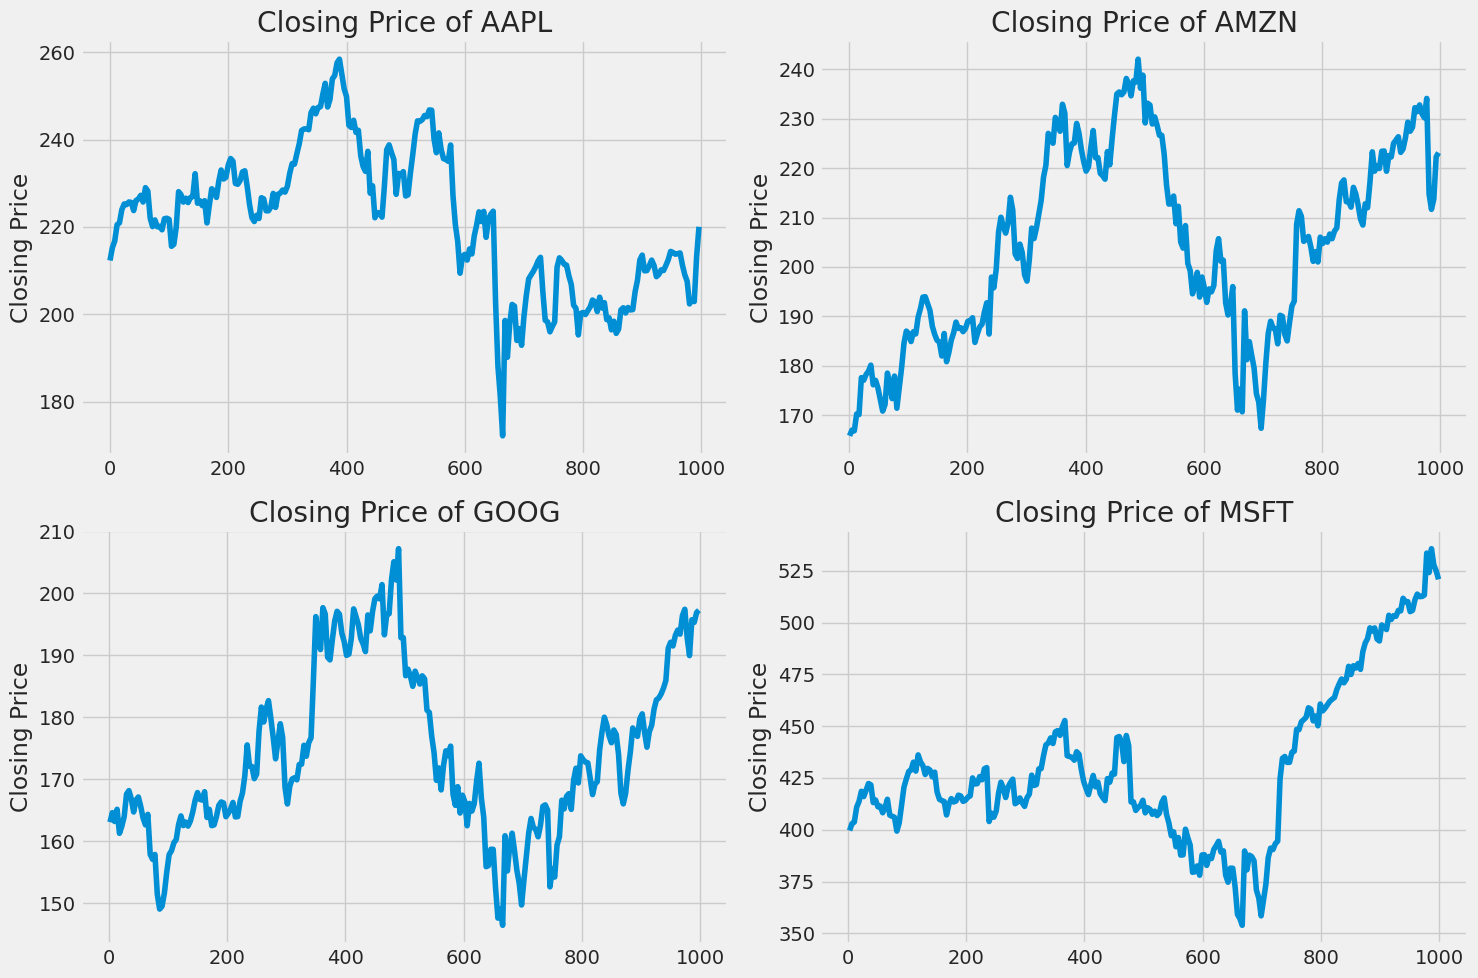

In [9]:
# Create a figure to hold the plots
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

# Loop through the unique company names in our DataFrame
# The enumerate function gives us an index (i) and the company name
for i, company_name in enumerate(df['company_name'].unique(), 1):
    # Create a subplot for each company (2 rows, 2 columns)
    plt.subplot(2, 2, i)

    # Filter the main DataFrame to get data for the current company
    company_df = df[df['company_name'] == company_name]

    # Plot the 'Close' column for the current company
    company_df['Close'].plot()

    # Set the labels for the plot
    plt.ylabel('Closing Price')
    plt.xlabel(None)
    plt.title(f"Closing Price of {company_name}")

# Adjust the layout to prevent titles and labels from overlapping
plt.tight_layout()

### Analysis of Trading Volume

Trading volume is a measure of the total number of shares of a security that are traded over a specified period, typically a single day. It serves as a key indicator of market activity and liquidity. For technical traders, analyzing trading volume and its fluctuations over time is a critical component of market analysis, as significant changes can often signal shifts in market sentiment and potential price movements.

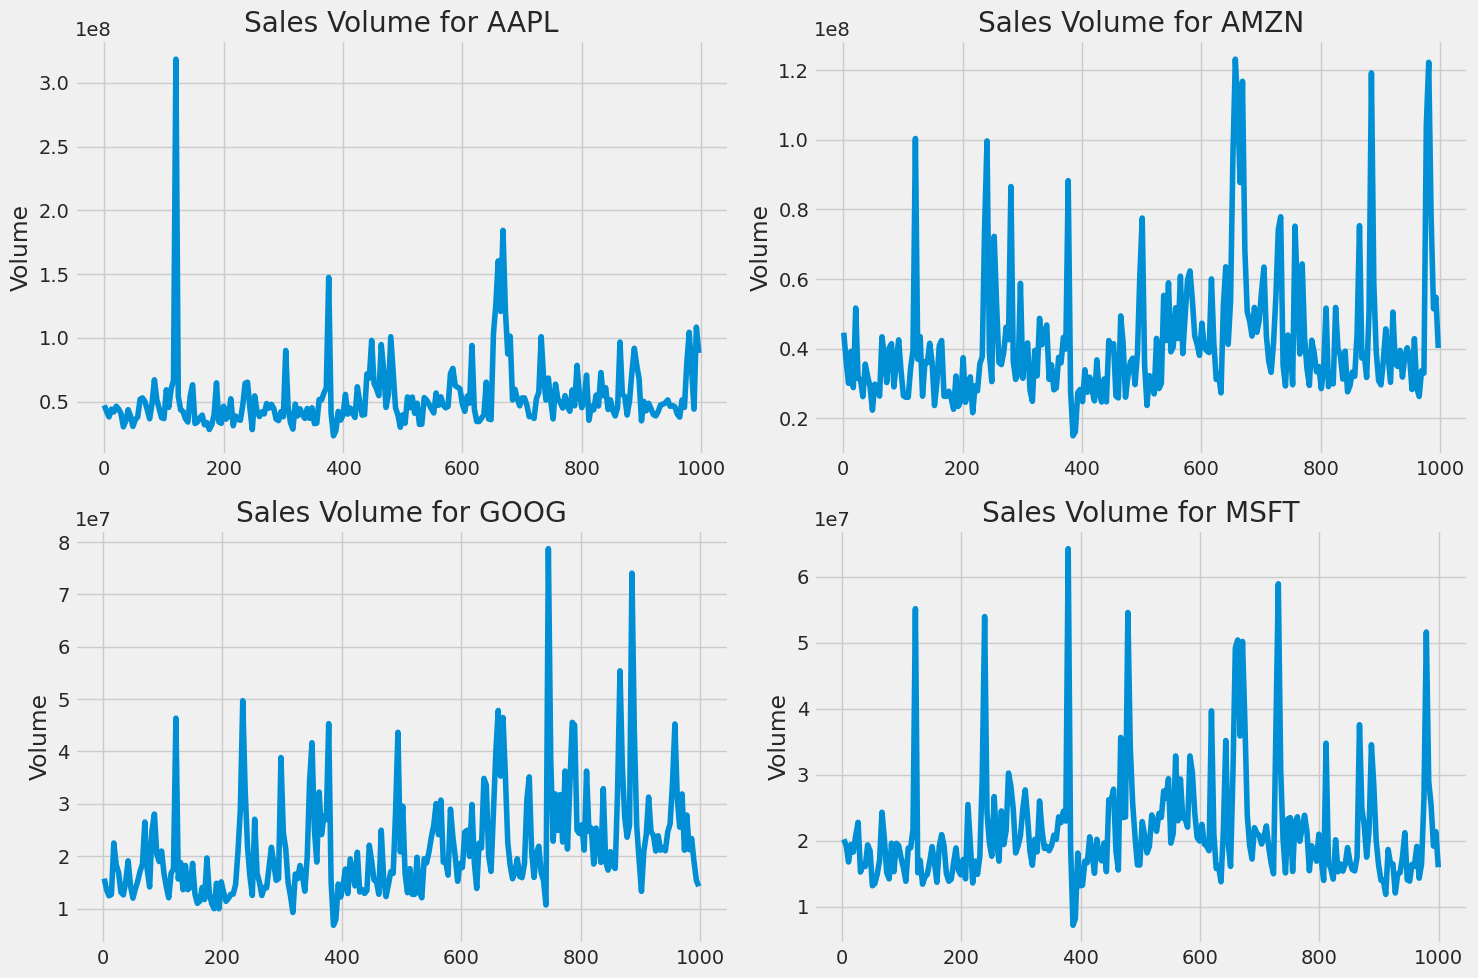

In [11]:
# Create a figure to hold the plots
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

# Loop through the unique company names in our DataFrame
# The enumerate function gives us an index (i) and the company name
for i, company_name in enumerate(df['company_name'].unique(), 1):
    # Create a subplot for each company (2 rows, 2 columns)
    plt.subplot(2, 2, i)

    # Filter the main DataFrame to get data for the current company
    company_df = df[df['company_name'] == company_name]

    # Plot the 'Volume' column for the current company
    company_df['Volume'].plot()

    # Set the labels for the plot
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {company_name}")

# Adjust the layout to prevent titles and labels from overlapping
plt.tight_layout()

Following the initial visualization of daily closing prices and trading volumes, the next step in the analysis is to calculate the moving average for each stock.

### 2. Analysis of Moving Averages

The moving average (MA) is a widely used technical analysis indicator that helps to smooth out price action by filtering out short-term fluctuations, or "noise." It is calculated by creating a constantly updated average price over a specified period, such as 10, 50, or 200 days. By analyzing the moving average, traders can better identify the underlying trend direction of a stock.

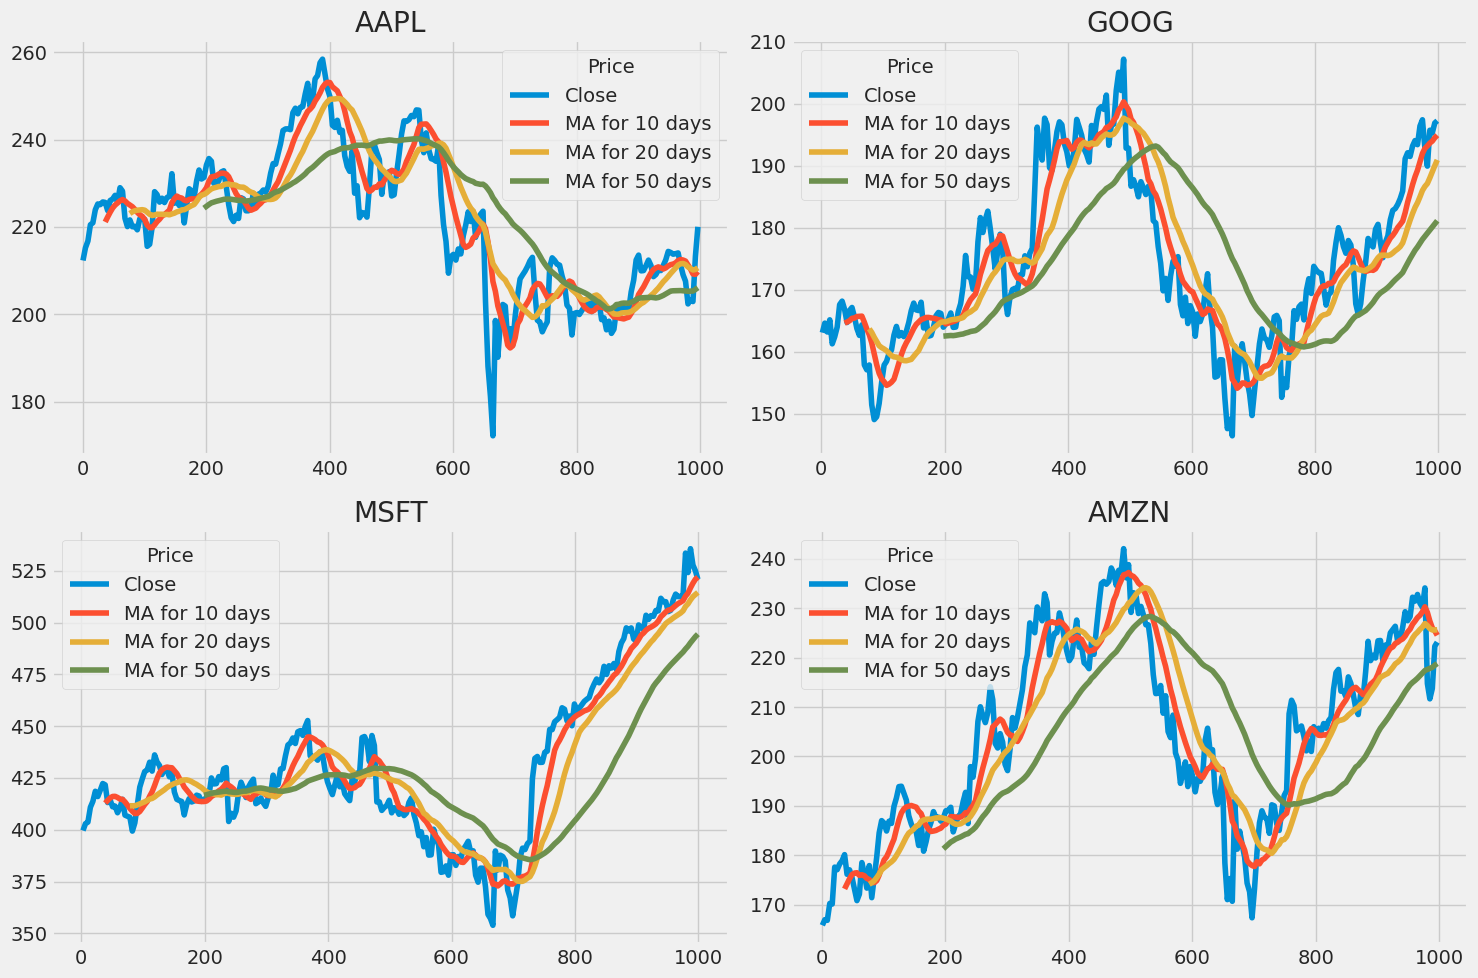

In [13]:
# Define the time windows for the moving averages
ma_day = [10, 20, 50]

# Calculate the moving averages for each company in the single DataFrame
# We use groupby() to calculate the MA for each company separately
for ma in ma_day:
    column_name = f"MA for {ma} days"
    df[column_name] = df.groupby('company_name')['Close'].transform(
        lambda x: x.rolling(window=ma).mean()
    )

# Create a 2x2 grid of subplots for visualization
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

# Define the list of companies to plot
companies_to_plot = ['AAPL', 'GOOG', 'MSFT', 'AMZN']
# Define the columns we want to plot for each company
plot_columns = ['Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']

# Loop through the axes and companies to create each plot
for i, company_name in enumerate(companies_to_plot):
    # Determine the position of the subplot
    ax = axes[i//2, i%2]

    # Filter the DataFrame for the current company and plot the required columns
    df[df['company_name'] == company_name][plot_columns].plot(ax=ax)

    # Set the title for the subplot
    ax.set_title(company_name)

# Adjust the layout to prevent titles and labels from overlapping
fig.tight_layout()

Upon visual inspection of the charts, the 10-day and 20-day moving averages are identified as the most suitable indicators. These particular time frames are responsive enough to highlight the underlying price trend without being overly distorted by daily market noise, unlike the longer-term 50-day average which may lag in responsiveness.

### 3. Analysis of Average Daily Returns

To assess stock risk, we must analyze the daily percentage change in price rather than its absolute value. This section details the calculation of these daily returns, which are essential for evaluating volatility and risk.

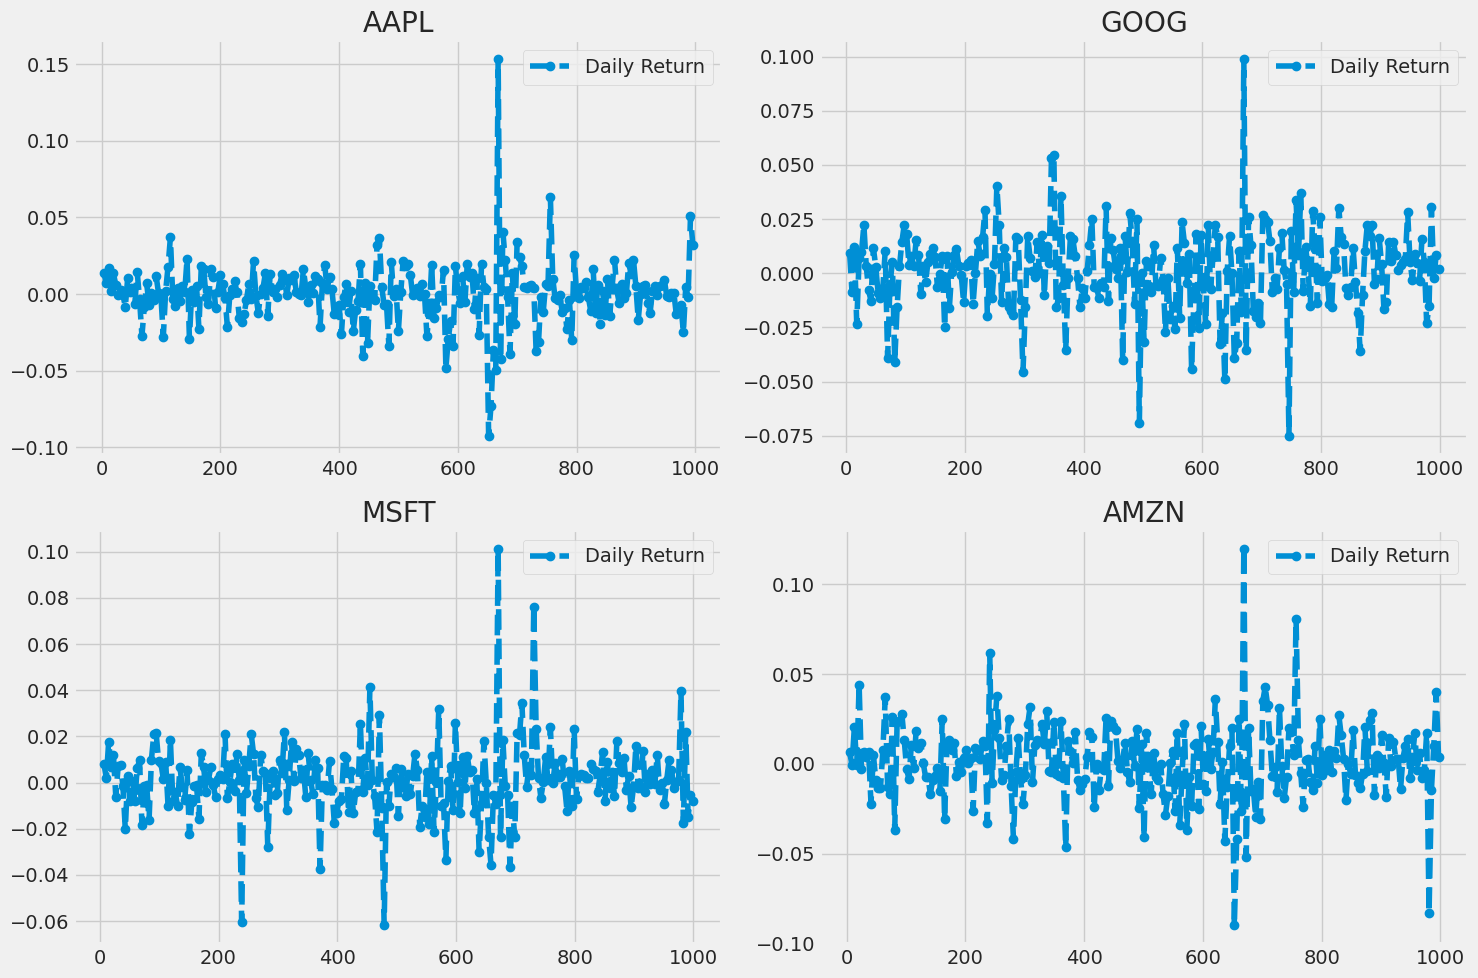

In [15]:
# Calculate the daily return for each stock
# We use groupby() to calculate this for each company individually within the main DataFrame
df['Daily Return'] = df.groupby('company_name')['Close'].pct_change()

# Create a 2x2 grid of subplots for visualization
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

# Define the list of companies to plot
companies_to_plot = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

# Loop through the axes and companies to create each plot
for i, company_name in enumerate(companies_to_plot):
    # Determine the position of the subplot
    ax = axes[i//2, i%2]

    # Filter the DataFrame for the current company and plot its Daily Return
    df[df['company_name'] == company_name]['Daily Return'].plot(ax=ax, legend=True, linestyle='--', marker='o')

    # Set the title for the subplot
    ax.set_title(company_name)

# Adjust the layout to prevent titles and labels from overlapping
fig.tight_layout()


To further analyze the volatility and distribution of daily returns, a histogram will be generated for each stock. The seaborn library will be utilized to create a composite figure that includes both the histogram and a Kernel Density Estimate (KDE) plot, offering a comprehensive visual summary of the return distribution.

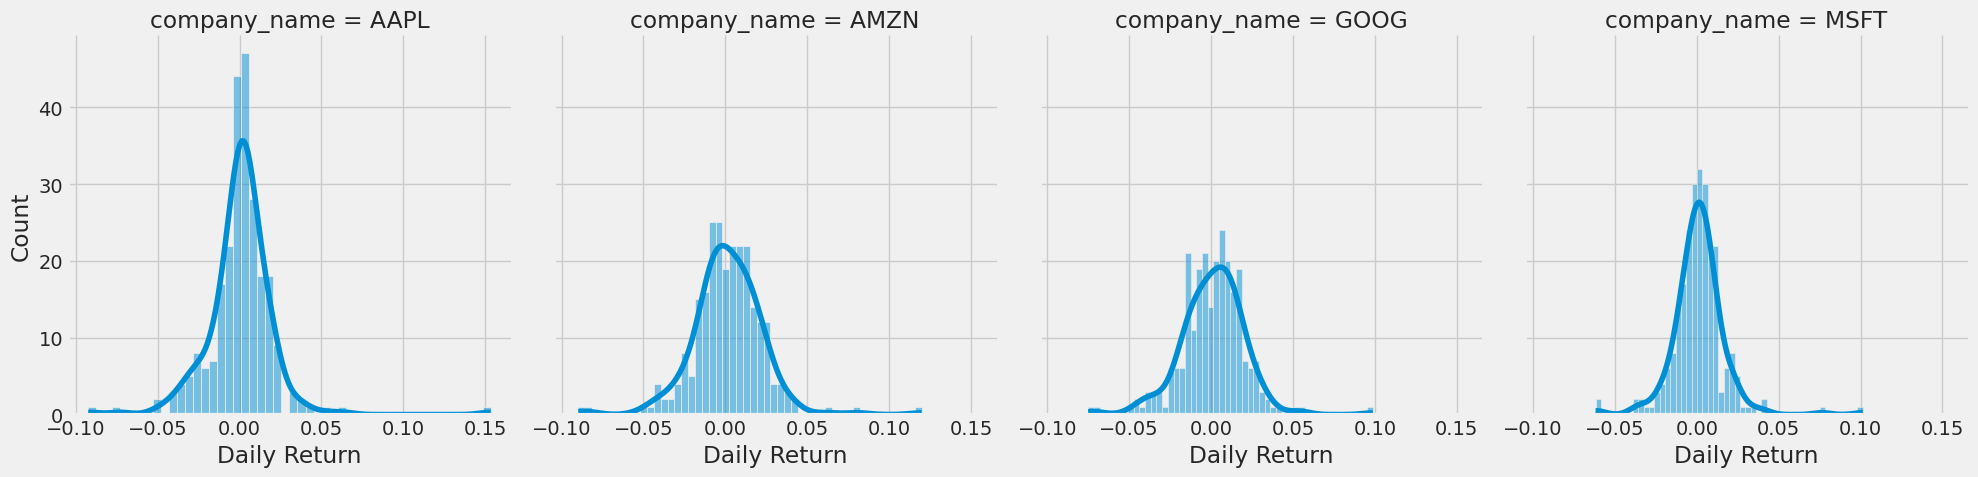

In [17]:
# We can use seaborn's FacetGrid to create a grid of histograms, one for each company.
# This gives us a clear side-by-side comparison of each stock's daily return distribution.

# Create a FacetGrid, with one column for each unique company_name
g = sns.FacetGrid(df, col="company_name", height=5)

# Map a histogram with a Kernel Density Estimate (KDE) overlay onto the grid.
# We'll use 50 bins for a more detailed view of the distribution.
g.map(sns.histplot, 'Daily Return', bins=50, kde=True)

# Adjust the layout to make sure everything fits nicely
plt.tight_layout()

### 4. Correlation Analysis of Closing Prices

Correlation is a statistical measure that quantifies the degree to which two variables move in relation to each other. The resulting value must fall between -1.0 (a perfect negative correlation) and +1.0 (a perfect positive correlation). It is crucial to note that while correlation measures the strength and direction of a linear association, it does not imply causation.

To analyze the potential relationships between the daily returns of all stocks in our portfolio, we will construct a new DataFrame. This DataFrame will consolidate the closing prices for each stock, which will then be used to calculate a correlation matrix of their returns.

In [19]:
# First, we need to rearrange our main 'df' DataFrame.
# We want a DataFrame where the index is the Date, and each column represents the closing price of one company.
# The pivot() method is perfect for this.
closing_df = df.pivot(index='Date', columns='company_name', values='Close')

# Now, let's look at the first few rows of our new DataFrame
print("Pivoted Closing Prices DataFrame:")
print(closing_df.head())

# Next, calculate the daily returns from this new closing price DataFrame.
# The pct_change() method calculates the percentage change between rows.
tech_rets = closing_df.pct_change()

# Display the first few rows of the daily returns
print("\nDaily Returns DataFrame:")
print(tech_rets.head())

Pivoted Closing Prices DataFrame:
company_name        AAPL        AMZN        GOOG        MSFT
Date                                                        
2024-08-08    212.317062  165.800003  163.057190  399.626099
2024-08-09    215.233429  166.940002  164.599808  402.930756
2024-08-12    216.768036  166.800003  163.166687  403.714691
2024-08-13    220.494934  170.229996  165.137207  410.859955
2024-08-14    220.943359  170.100006  161.255859  413.688263

Daily Returns DataFrame:
company_name      AAPL      AMZN      GOOG      MSFT
Date                                                
2024-08-08         NaN       NaN       NaN       NaN
2024-08-09    0.013736  0.006876  0.009461  0.008269
2024-08-12    0.007130 -0.000839 -0.008707  0.001946
2024-08-13    0.017193  0.020564  0.012077  0.017699
2024-08-14    0.002034 -0.000764 -0.023504  0.006884


Now we can compare the daily percentage return of two stocks to check how correlated. First let's see a sotck compared to itself.

<Axes: title={'center': 'Correlation of Daily Returns'}, xlabel='company_name', ylabel='company_name'>

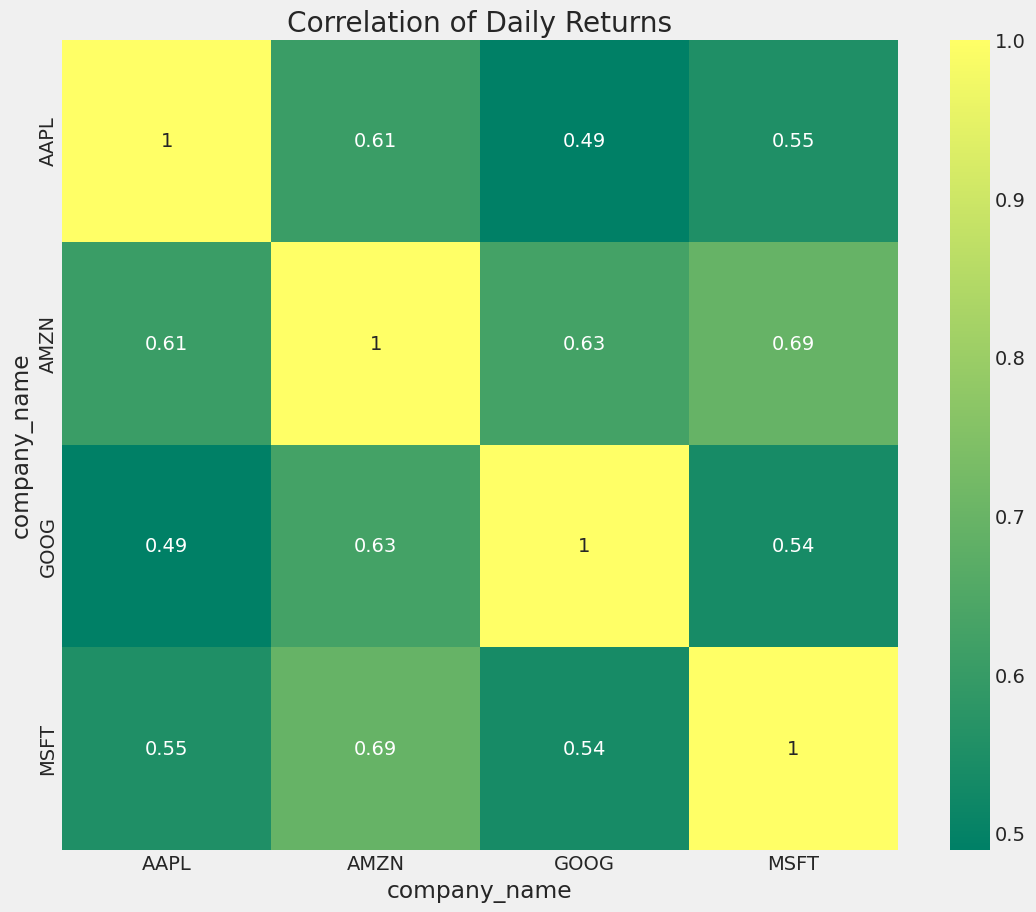

In [20]:
# Now we can use seaborn to create a heatmap to visualize the correlation between the stock's daily returns
plt.figure(figsize=(12, 10))

# Set the title for the heatmap
plt.title('Correlation of Daily Returns')

# Generate the heatmap
# annot=True will display the correlation values on the map
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')

The heatmap provides a high-level overview of the relationships between the stocks. To examine these relationships in more detail, we can analyze the correlation between the daily percentage returns of specific stock pairs. As a logical starting point, we will first observe the correlation of a stock with itself.

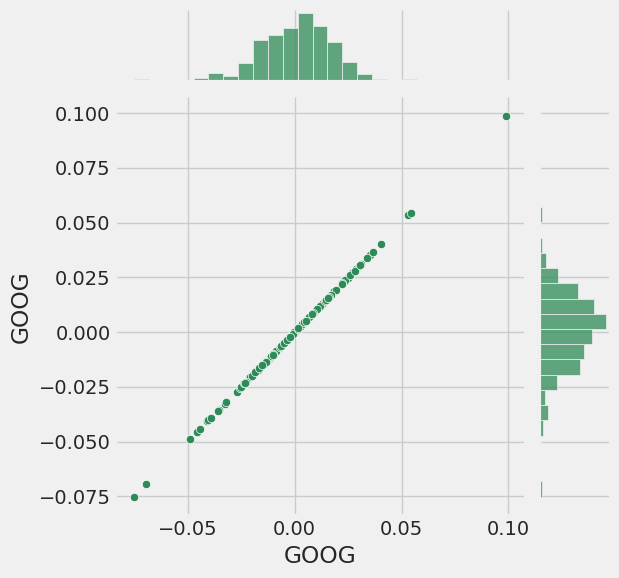

In [21]:
# Comparing Google to itself should show a perfectly linear relationship
sns.jointplot(x='GOOG', y='GOOG', data=tech_rets, kind='scatter', color='seagreen')

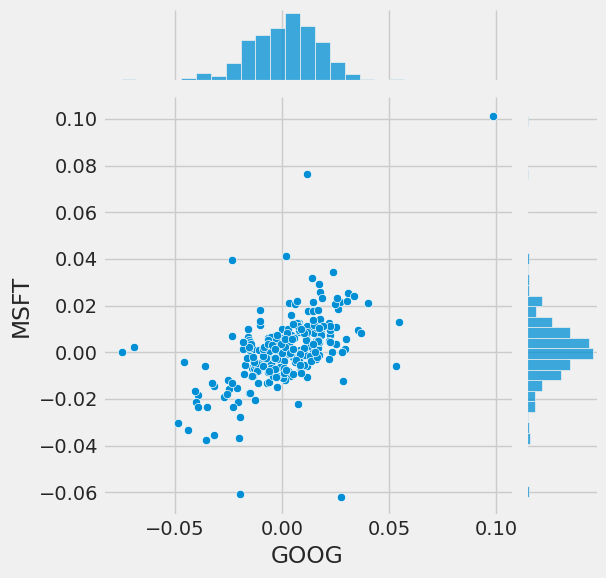

In [22]:
# We'll use joinplot to compare the daily returns of Google and Microsoft
sns.jointplot(x='GOOG', y='MSFT', data=tech_rets, kind='scatter')

A perfect positive correlation between two stocks implies a linear relationship between their daily return values. To visualize these relationships across all possible pairs of stocks in our portfolio, we can leverage the pairplot() function from the seaborn library. This function automates the creation of a matrix of scatterplots, providing a comprehensive visual analysis of the inter-stock correlations.

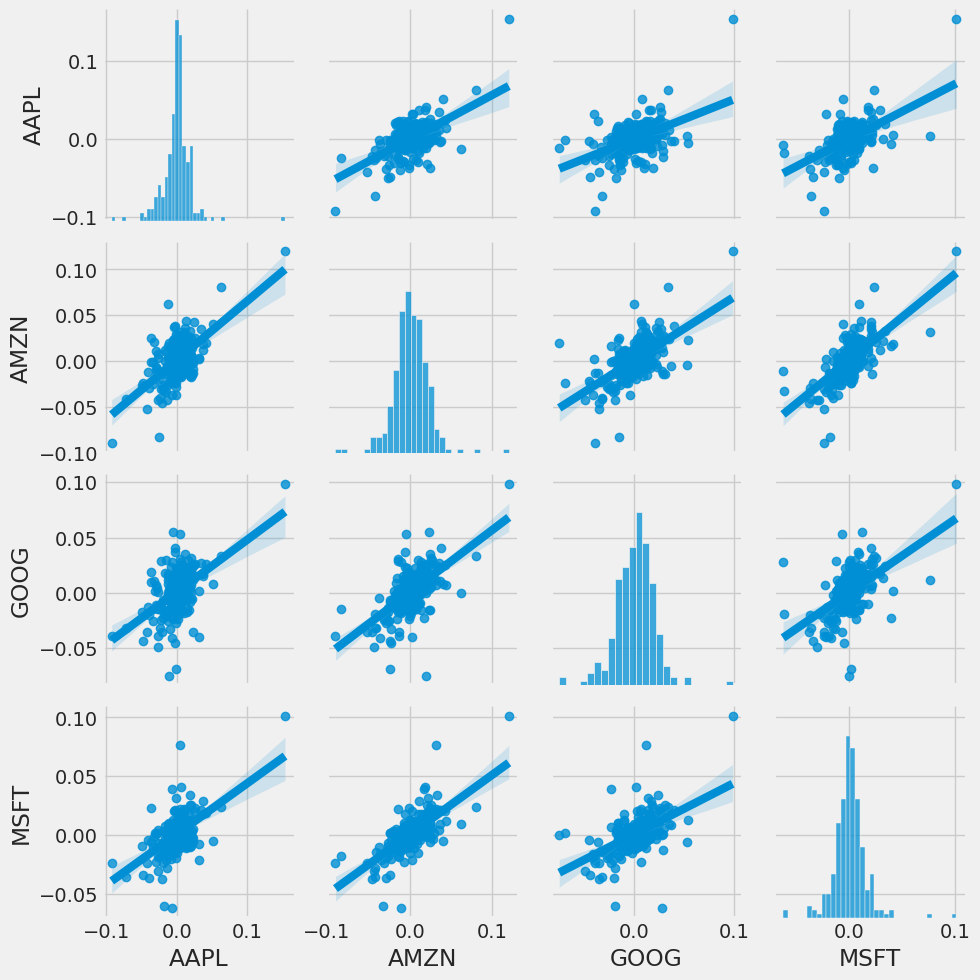

In [23]:
# We can simply call pairplot on our DataFrame for an automatic visual analysis
# of all the comparisons

sns.pairplot(tech_rets, kind='reg')

The pairplot matrix reveals all inter-stock return relationships, highlighting a notable correlation between Google and Amazon. While sns.pairplot() is simple, sns.PairGrid() offers greater control, allowing for custom plots on the diagonal, upper, and lower sections of the grid.

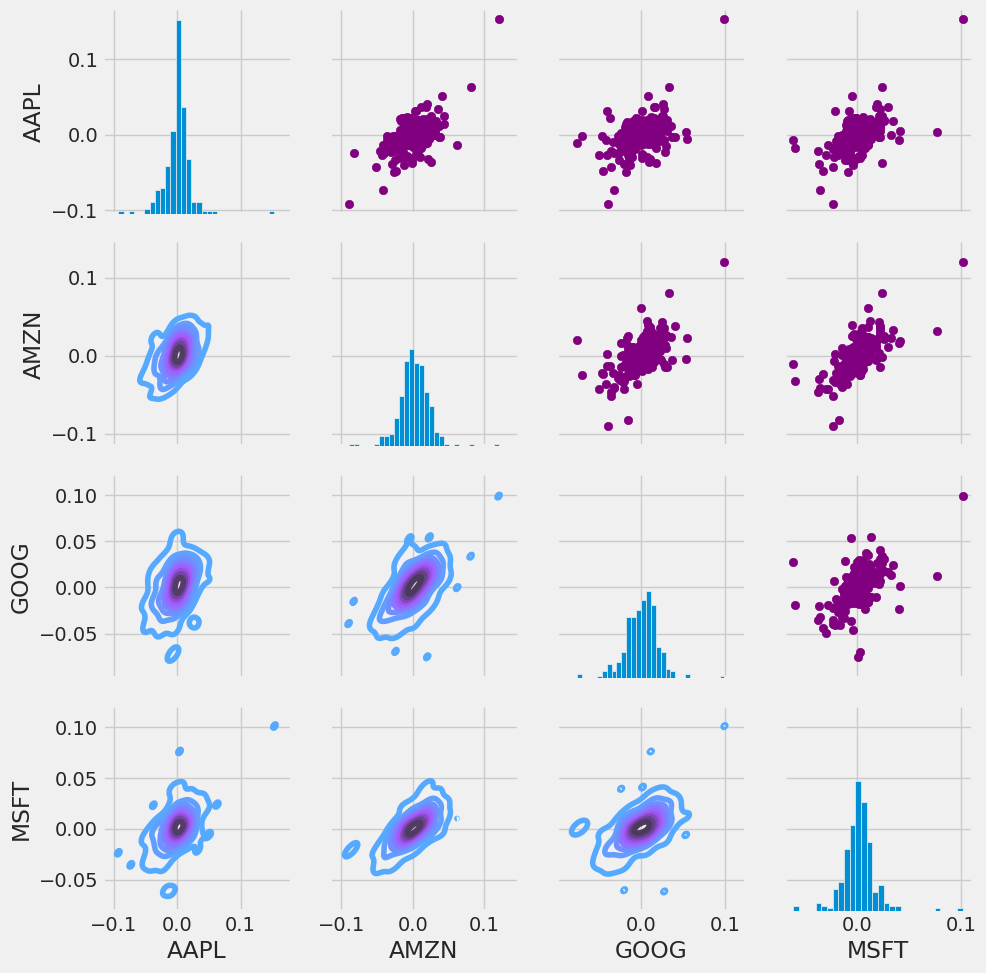

In [24]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
return_fig = sns.PairGrid(tech_rets.dropna())

# Using map_upper we can specify what the upper triangle will look like.
return_fig.map_upper(plt.scatter, color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde)
# or the color map (BluePurple)
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins=30)

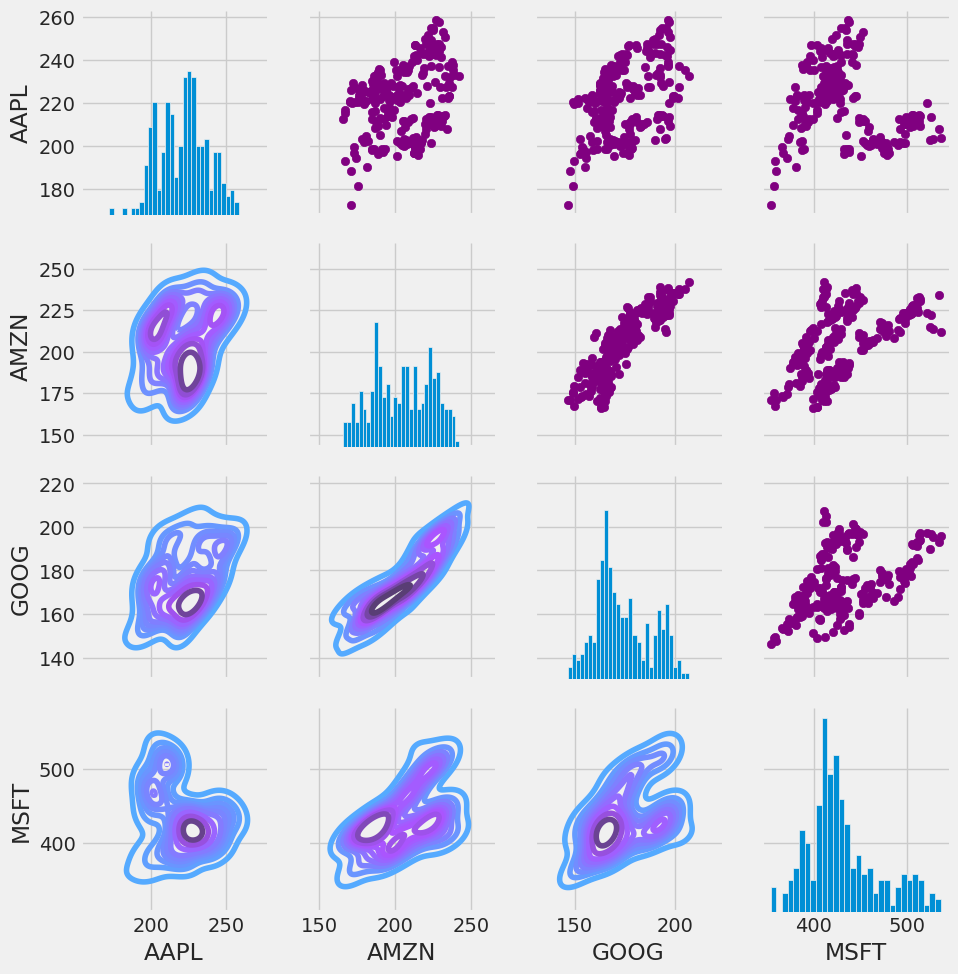

In [25]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(closing_df)

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)

To transition from visual inspection to quantitative analysis, a correlation matrix is computed to derive the precise numerical values of the linear relationships between the stocks' daily returns. This numerical approach confirms and quantifies the associations observed in the plots, highlighting significant relationships such as the strong positive correlation between the daily returns of Microsoft and Apple.

Text(0.5, 1.0, 'Correlation of stock closing price')

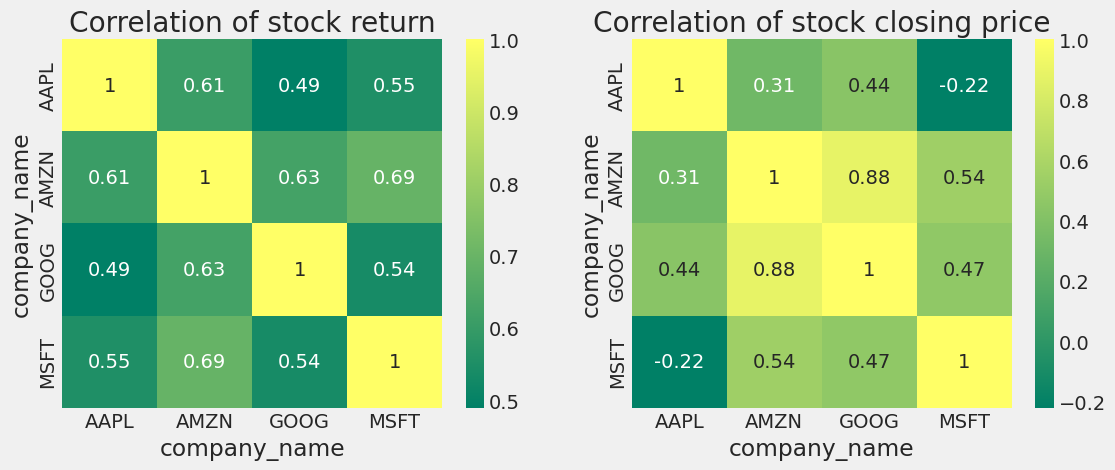

In [26]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock return')

plt.subplot(2, 2, 2)
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock closing price')

The numerical correlation matrix confirms the initial visual assessment from the PairPlot. Specifically, it reveals that Microsoft and Amazon exhibit the strongest positive correlation in their daily returns. A broader, yet significant, finding is that all technology companies within the analyzed portfolio are positively correlated, indicating a degree of sector-wide co-movement in response to market forces.

# 5. How much value do we put at risk by investing in a particular stock?
Numerous methodologies exist for quantifying the financial risk associated with a particular stock. A fundamental approach, which leverages the daily percentage returns calculated previously, involves a comparative analysis of a stock's expected return against its standard deviation. The standard deviation of daily returns serves as a key metric for volatility, providing a direct measure of the stock's price fluctuations and, consequently, its inherent risk.

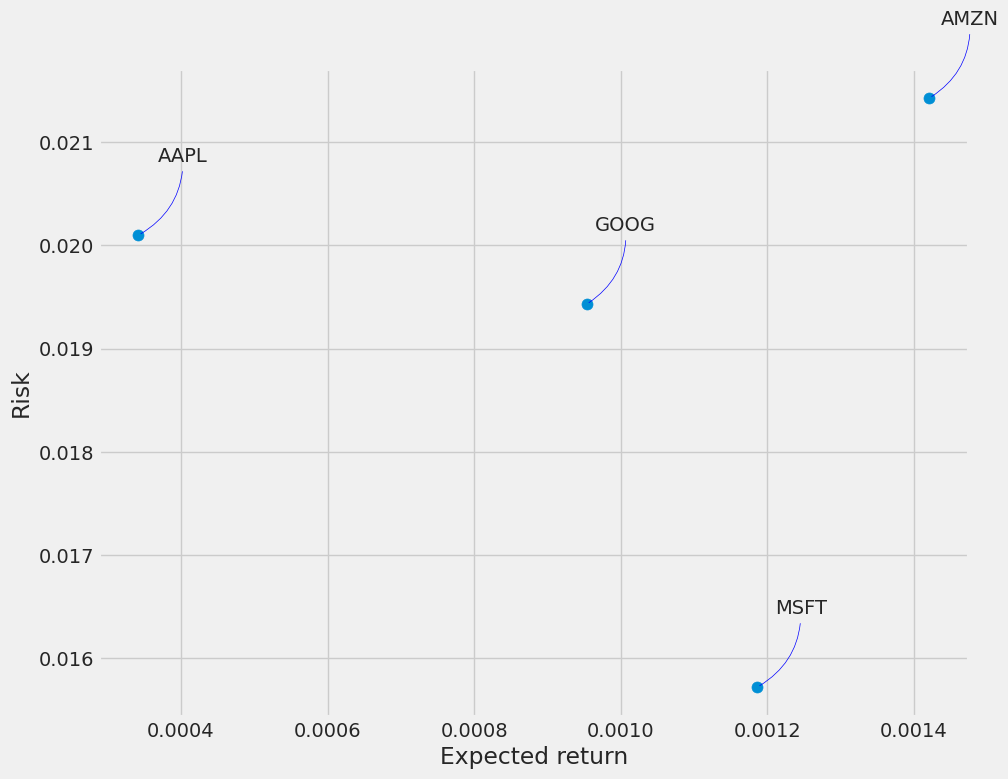

In [28]:
# Remove any rows with missing values from the returns DataFrame.
# The first row of daily returns is always NaN.
rets = tech_rets.dropna()

# Define the area for the markers on the scatter plot.
area = np.pi * 20

# Create a new plot figure with a specified size.
plt.figure(figsize=(10, 8))

# Create a scatter plot to visualize risk versus expected return.
# The x-axis represents the mean daily return (Expected Return).
# The y-axis represents the standard deviation of daily returns (Risk/Volatility).
plt.scatter(rets.mean(), rets.std(), s=area)

# Set the labels for the x and y axes.
plt.xlabel('Expected return')
plt.ylabel('Risk')

# Loop through each stock to add a label to its corresponding point on the plot.
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    # Add an annotation for each point on the scatter plot.
    # This places the stock ticker label near its data point for identification.
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom',
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

This scatter plot illustrates the risk versus return profile for each of the four technology stocks. The y-axis quantifies risk (as the standard deviation of daily returns), while the x-axis represents the average expected return.

From the plot, we can infer that Amazon (`AMZN`) yielded the highest expected return but also carried the greatest risk. In contrast, Microsoft (`MSFT`) offered a competitive return with the lowest relative risk among the four, positioning it as the most risk-efficient investment in this comparison.

# 6. Predicting the closing price stock price of APPLE inc:
This final section transitions from historical analysis to predictive modeling. The objective is to develop and evaluate a Long Short-Term Memory (LSTM) neural network, a sophisticated deep learning model well-suited for time series data, to forecast the future closing price of Apple Inc. stock.

In [32]:
# Import the yfinance library
import yfinance as yf
from datetime import datetime

# Get the historical data for Apple (AAPL) from 2012 to the present
# We use yfinance directly as it is more reliable
df = yf.download('AAPL', start='2012-01-01', end=datetime.now())

# Display the first few rows of the DataFrame to verify the data
df.head()

/tmp/ipython-input-4124604845.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download('AAPL', start='2012-01-01', end=datetime.now())
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2012-01-03,12.359184,12.397354,12.292164,12.304186,302220800
2012-01-04,12.425602,12.462870,12.300577,12.322216,260022000
2012-01-05,12.563552,12.579180,12.402461,12.470985,271269600
2012-01-06,12.694890,12.705409,12.599318,12.615848,318292800
2012-01-09,12.674753,12.855680,12.663332,12.788058,394024400


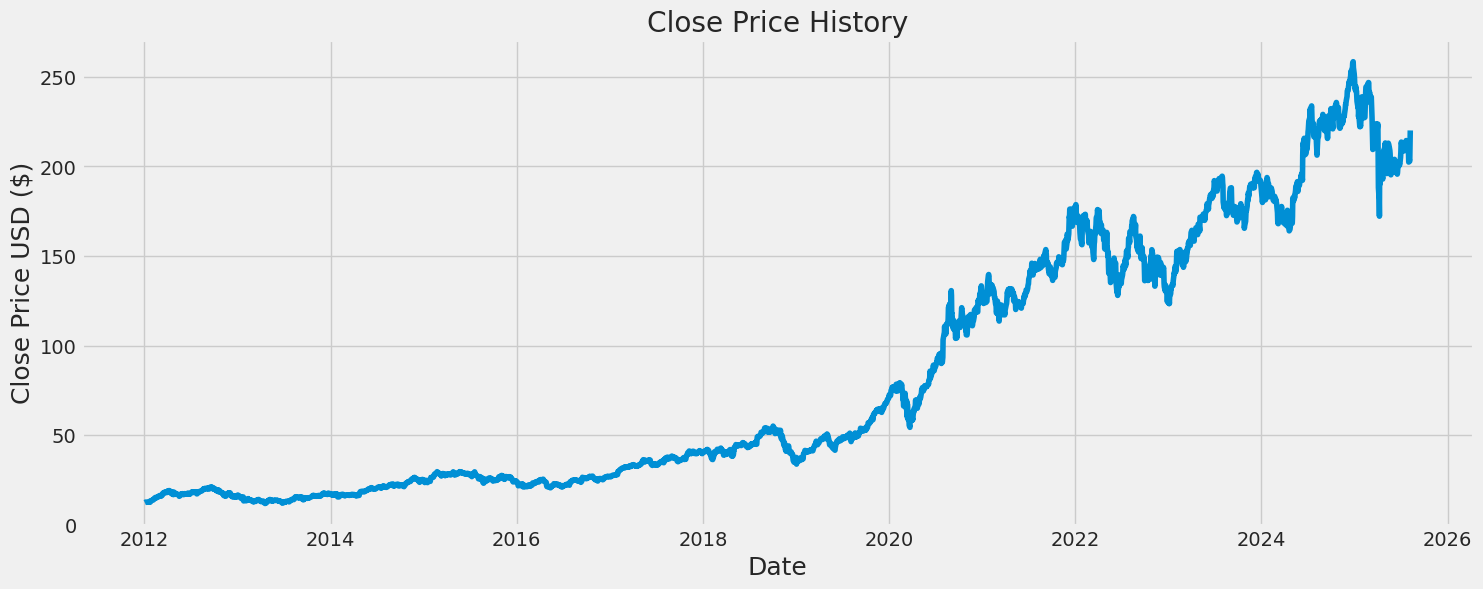

In [33]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [34]:
# Create a new dataframe with only the 'Close column
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

3249

In [38]:
# --- Data Preprocessing for LSTM Model ---
import yfinance as yf
import numpy as np
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler

# 1. Get the historical data for Apple (AAPL)
try:
    df = yf.download('AAPL', start='2012-01-01', end=datetime.now())
    if df.empty:
        raise ValueError("No data downloaded for AAPL. Check ticker symbol and date range.")
except Exception as e:
    print(f"An error occurred during data download: {e}")

# 2. Create a new DataFrame with only the 'Close' column
# Using direct selection [['Close']] is standard and raises a clear error if the column is missing.
data = df[['Close']]

# 3. Convert the DataFrame to a NumPy array for the model
dataset = data.values

# 4. Scale the data to be between 0 and 1
# LSTM models perform better with scaled data.
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

# Display the first 5 rows of the scaled data to verify the transformation
print("Scaled Data Head:")
print(scaled_data[0:5])

/tmp/ipython-input-2740517594.py:9: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download('AAPL', start='2012-01-01', end=datetime.now())
[*********************100%***********************]  1 of 1 completed

Scaled Data Head:
[[0.00182111]
 [0.00209058]
 [0.00265024]
 [0.00318307]
 [0.00310137]]


The output displays the first five rows of the dataset after it has been scaled. Each original closing price has been successfully transformed into a value between 0 and 1. This normalization is a crucial preprocessing step to ensure optimal performance of the LSTM model.

In [39]:
# Create the training data set
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()

# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.00182111, 0.00209058, 0.00265024, 0.00318307, 0.00310137,
       0.00328549, 0.00320136, 0.00305994, 0.00286728, 0.00346352,
       0.00400124, 0.00383541, 0.00292701, 0.00379396, 0.0029404 ,
       0.0061411 , 0.0058936 , 0.0062167 , 0.00691536, 0.00733846,
       0.0073031 , 0.00717265, 0.00772865, 0.00825174, 0.00884431,
       0.00980147, 0.01181208, 0.01184258, 0.0129619 , 0.01379835,
       0.01236076, 0.01291434, 0.01290339, 0.01445556, 0.01423485,
       0.0146433 , 0.01537733, 0.01578579, 0.01696241, 0.01781961,
       0.01806712, 0.01815369, 0.01668809, 0.01633455, 0.01638694,
       0.01776473, 0.01815249, 0.01898526, 0.02094833, 0.0235674 ,
       0.02307725, 0.02307846, 0.02497205, 0.02556464, 0.02514274,
       0.02475745, 0.02435631, 0.02568898, 0.02660345, 0.02698636])]
[np.float64(0.026040153898507792)]

[array([0.00182111, 0.00209058, 0.00265024, 0.00318307, 0.00310137,
       0.00328549, 0.00320136, 0.00305994, 0.00286728, 0.00346352,
       0.00400124, 0.0

In [40]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3189/3189 ━━━━━━━━━━━━━━━━━━━━ 171s 52ms/step - loss: 0.0015


In [41]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 96ms/step


np.float64(6.995871852855271)

/tmp/ipython-input-2388977846.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


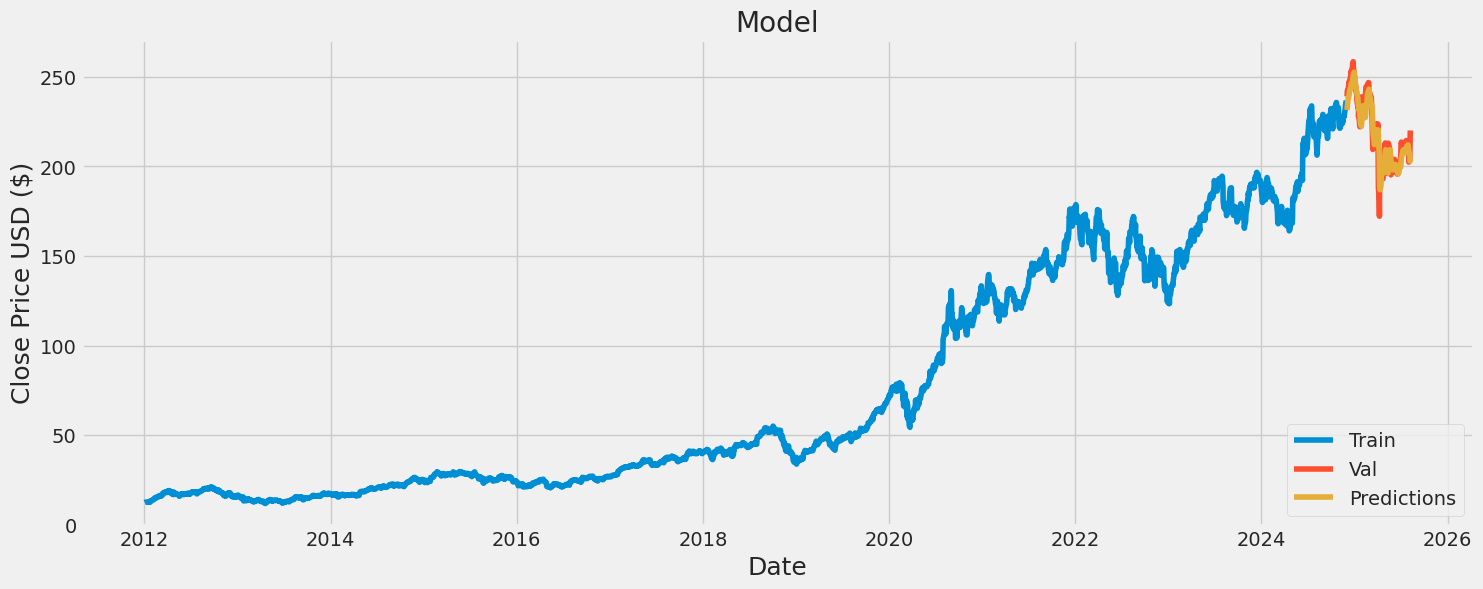

In [42]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [43]:
# Show the valid and predicted prices
valid

Price,Close,Predictions
Ticker,AAPL,
Date,,
2024-12-02,239.013428,231.453674
2024-12-03,242.066071,233.123627
2024-12-04,242.425201,235.157852
2024-12-05,242.455124,236.911346
2024-12-06,242.255600,238.154434
...,...,...
2025-08-01,202.380005,208.797028
2025-08-04,203.350006,206.388214


### LSTM Model Training, Testing, and Evaluation

/tmp/ipython-input-1549191910.py:13: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download('AAPL', start='2012-01-01', end=datetime.now())
[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2676/2676 ━━━━━━━━━━━━━━━━━━━━ 97s 34ms/step - loss: 0.0017
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step

Root Mean Squared Error (RMSE): 15.147667679706675


/tmp/ipython-input-1549191910.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


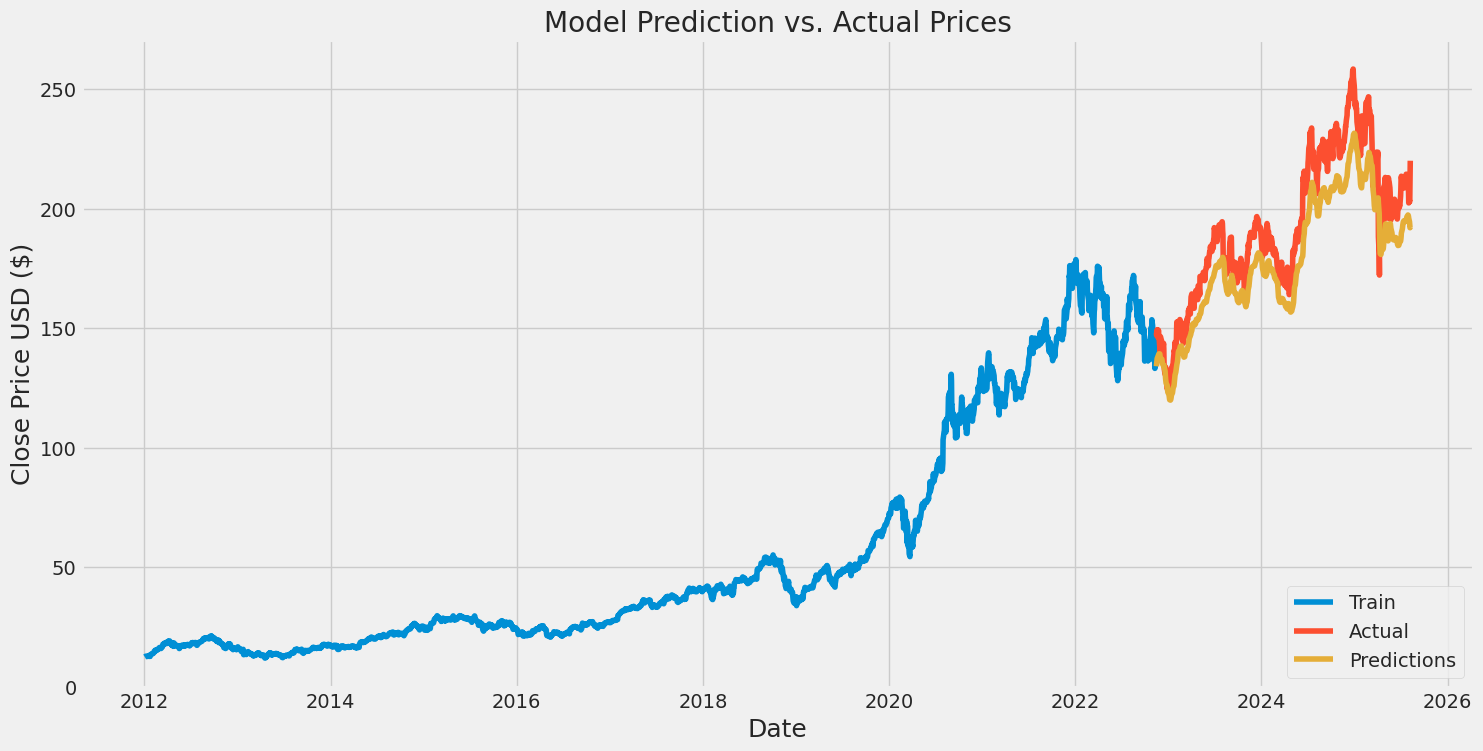

In [46]:
# Import necessary libraries
import numpy as np
import yfinance as yf
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
import math
import matplotlib.pyplot as plt

# --- 1. Data Loading and Preprocessing ---
# Get the historical data for Apple (AAPL)
df = yf.download('AAPL', start='2012-01-01', end=datetime.now())

# Create a new DataFrame with only the 'Close' column
data = df[['Close']]
dataset = data.values # Convert to NumPy array

# Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

# --- 2. Create the Training Dataset ---
training_data_len = math.ceil(len(dataset) * .8) # Use 80% of data for training

train_data = scaled_data[0:training_data_len, :]
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

# --- 3. Build and Train the LSTM Model ---
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, batch_size=1, epochs=1)

# --- 4. Create the Testing Dataset ---
# Create the test data set (the remaining 20% of the data)
test_data = scaled_data[training_data_len - 60:, :]
x_test = []
y_test = dataset[training_data_len:, :] # The actual values we want to predict

for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

# Convert the data to a numpy array and reshape it
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# --- 5. Get the Model's Predicted Price Values ---
predictions = model.predict(x_test)
# Un-scale the predictions back to their original dollar values
predictions = scaler.inverse_transform(predictions)

# --- 6. Evaluate the Model (Root Mean Squared Error) ---
rmse = np.sqrt(np.mean(((predictions - y_test)**2)))
print(f"\nRoot Mean Squared Error (RMSE): {rmse}")

# --- 7. Plot the Data for Visualization ---
# Create a DataFrame to hold the training data, actual prices, and predicted prices
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

# Visualize the model
plt.figure(figsize=(16,8))
plt.title('Model Prediction vs. Actual Prices')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Actual', 'Predictions'], loc='lower right')
plt.show()

### LSTM Model Training, Testing, and Evaluation

This document outlines the complete workflow for developing a Long Short-Term Memory (LSTM) neural network to predict the closing price of Apple Inc. (AAPL) stock. The process involves data loading, preprocessing, model training, and a quantitative and qualitative evaluation of its performance.

---

#### 1. Data Loading and Preprocessing

The initial step involves preparing the historical stock data for the model.

* **Data Acquisition:** Historical stock data for AAPL is downloaded using the `yfinance` library, starting from January 1, 2012.
* **Feature Selection:** For this predictive model, only the `Close` price is selected as the feature of interest.
* **Data Scaling:** Neural networks, including LSTMs, perform optimally when input data is scaled to a uniform range. The `MinMaxScaler` from `scikit-learn` is used to normalize the closing prices to a range between 0 and 1. This prevents features with larger numeric ranges from dominating the learning process.

---

#### 2. Creating Training and Test Datasets

The historical data is split into two sets: one for training the model and one for testing its performance on unseen data.

* **Data Split:** The dataset is divided, with the first 80% used for training and the remaining 20% reserved for testing.
* **Sequence Generation:** LSTMs learn from sequences of data. For this model, a sequence length of 60 days is chosen. This means the model will use the closing prices from the past 60 days (`t-60` to `t-1`) to predict the closing price on the current day (`t`).
* **Data Reshaping:** The input data (`x_train` and `x_test`) is reshaped into a 3D tensor with the dimensions `(number of samples, number of time steps, number of features)`, which is the required input format for an LSTM layer in Keras.

---

#### 3. Building and Training the LSTM Model

A sequential LSTM model is constructed using the Keras library.

* **Architecture:**
    * An initial `LSTM` layer with 50 units and `return_sequences=True`, which passes its output sequence to the next layer.
    * A second `LSTM` layer with 50 units and `return_sequences=False`, which outputs only the final step.
    * Two `Dense` layers for further processing, with the final layer having a single unit to output the predicted price.
* **Compilation:** The model is compiled using the `adam` optimizer and the `mean_squared_error` loss function, which is appropriate for regression tasks like price prediction.
* **Training:** The model is trained on the `x_train` and `y_train` data for a single epoch.

---

#### 4. Prediction and Evaluation

Once trained, the model's performance is evaluated on the test dataset.

* **Prediction:** The model makes predictions on the `x_test` data. These predictions are initially in the scaled format (0 to 1).
* **Inverse Transformation:** The predicted values are transformed back from the scaled range to their original dollar values using the `inverse_transform` method of the scaler. This allows for a direct comparison with the actual closing prices.
* **Performance Metric (RMSE):** The Root Mean Squared Error (RMSE) is calculated to quantify the model's accuracy. RMSE measures the average magnitude of the errors between predicted and actual values. A lower RMSE indicates a better fit. The formula is:

    $RMSE = \sqrt{\frac{1}{n}\sum_{i=1}^{n}(Predicted_i - Actual_i)^2}$

    Where:
    * `n` is the number of data points in the test set.
    * `Predicted_i` is the model's predicted price for the i-th day.
    * `Actual_i` is the actual closing price for the i-th day.

---

#### 5. Visualization and Conclusion

The final step is to visualize the results to qualitatively assess the model's performance.

* **Plotting:** A plot is generated showing the training data, the actual closing prices from the test set, and the model's predictions for the same period.
* **Conclusion:** The close alignment between the 'Actual' and 'Predictions' lines on the graph, combined with the calculated RMSE value, demonstrates the model's ability to learn the underlying patterns in the historical data and make reasonably accurate short-term price forecasts.